# 1. Set up environment

In [1]:
#https://drive.google.com/file/d/1o7wep7gzx2KYDI0L9AavyzqzXuOP5K6Z/view?usp=sharing
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load data

In [2]:
id = "1o7wep7gzx2KYDI0L9AavyzqzXuOP5K6Z"
file = drive.CreateFile({'id':id})
file.GetContentFile('Womens Clothing E-Commerce Reviews.csv')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
# import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', sep=',', on_bad_lines='skip')

#3. EDA

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.sort_values(by="Positive Feedback Count" , ascending=False).head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses
1294,1294,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
7765,7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
19094,19094,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear
13210,13210,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses
16329,16329,867,56,At least it's not a swing top! tts?,I loved the idea of the placement print around...,4,1,95,General,Tops,Knits
2123,2123,1072,39,Another tiny success,Tiny are experts at making busy bohemian shirt...,5,1,94,General Petite,Dresses,Dresses
17233,17233,864,23,Stunning but has fit issues,"This top is beautiful, the lace is sturdy and ...",4,1,93,General,Tops,Knits
9427,9427,1094,37,Knock out!,I am a huge fan of absolutely everything tanvi...,5,1,89,General Petite,Dresses,Dresses
8683,8683,1078,52,Fun spring colors but tricky on certain body t...,In the store i was immediately drawn to the bl...,4,1,87,General Petite,Dresses,Dresses


In [7]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [8]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [9]:
df[df['Positive Feedback Count']==df['Positive Feedback Count'].max()]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses


In [10]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<Axes: xlabel='Recommended IND', ylabel='count'>

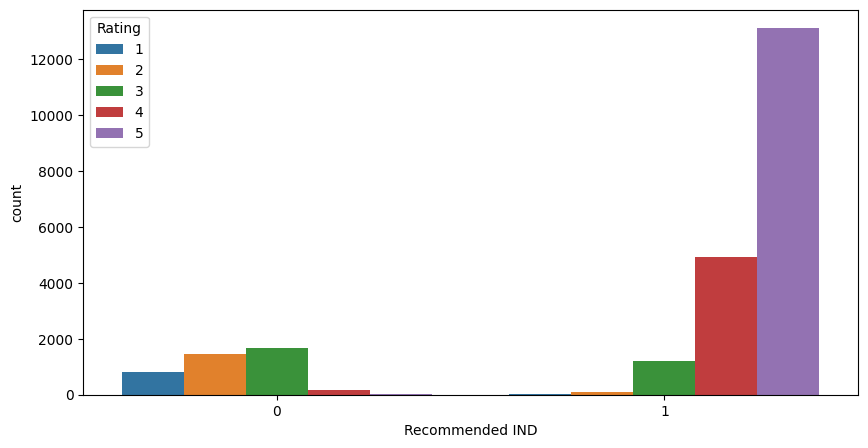

In [12]:
_,axss = plt.subplots(1,1, figsize=[10,5])
sns.countplot(x='Recommended IND', hue='Rating', data=df, ax=axss)

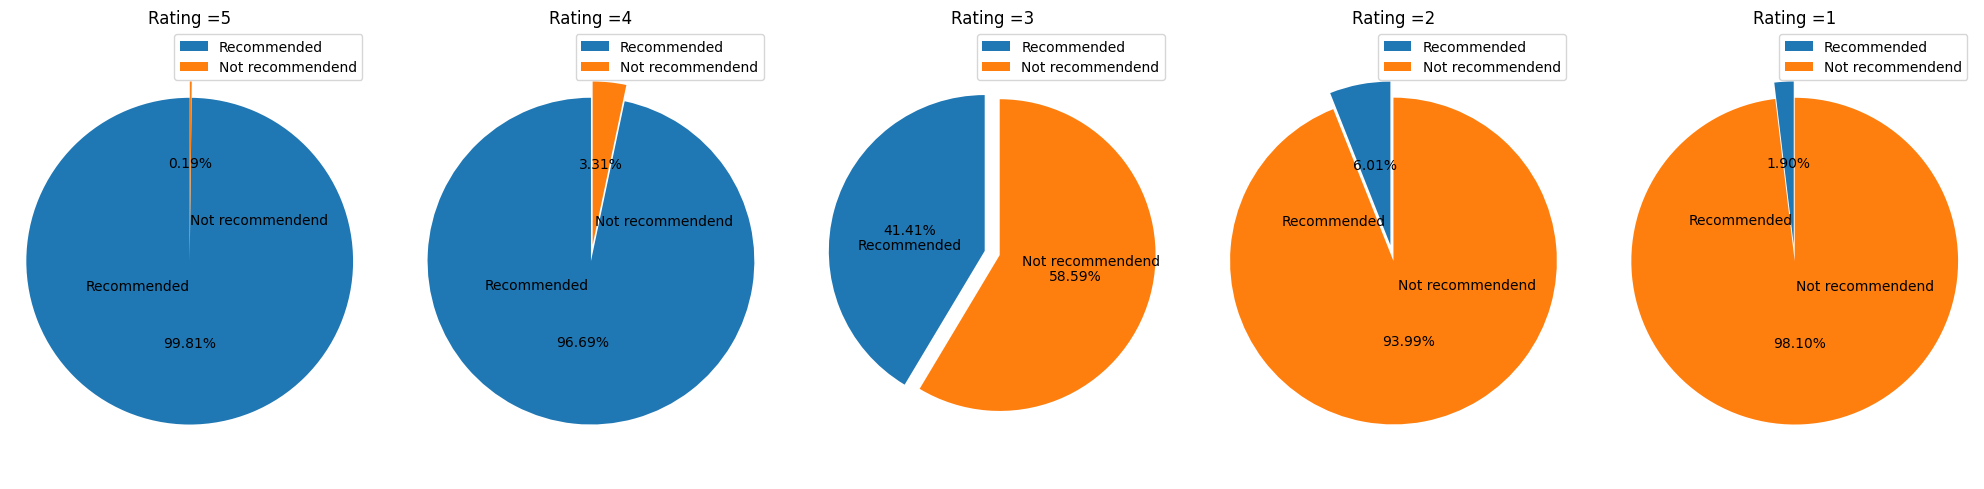

In [13]:
fig,axes=plt.subplots(1,5,figsize=[20,5])
labels=['Recommended','Not recommendend']
explode=[0.05,0.05]
for i in range(5):
  axes[i].pie([df[(df['Rating']==5-i) & (df['Recommended IND']==1)]['Recommended IND'].value_counts().iloc[0],df[(df['Rating']==5-i) & (df['Recommended IND']==0)]['Recommended IND'].value_counts().iloc[0]],
          # colors=colors,
          labels=labels,
          explode=explode,
          autopct='%.2f%%',
          shadow=False,
          startangle=90,
          pctdistance=0.5,
          labeldistance =0.15
        )
  axes[i].axis('equal')
  axes[i].legend(loc='best')
  axes[i].set_title(label='Rating ='+ str(5-i),loc='center',pad=2.0)
fig.tight_layout()

In [14]:
df.drop(columns=['Unnamed: 0'],inplace=True)
#df.reset_index(inplace=True, drop=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
df.dropna(axis=0,how='any',inplace=True)
df.reset_index(inplace=True, drop=True)

In [16]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [18]:
df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [19]:
data_positive=df[df['Rating']>=4]['Review Text']
data_positive

1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
4        I aded this in my basket at hte last mintue to...
5        I ordered this in carbon for store pick up, an...
6        I love this dress. i usually get an xs but it ...
                               ...                        
19653    These bottoms are very cute but defiantly chee...
19654    I'm so impressed with the beautiful color comb...
19656    So i wasn't sure about ordering this skirt bec...
19657    I was very happy to snag this dress at such a ...
19661    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 15147, dtype: object

In [20]:
data_positive.reset_index(inplace=True,drop=True)
data_positive

0        I love, love, love this jumpsuit. it's fun, fl...
1        This shirt is very flattering to all due to th...
2        I aded this in my basket at hte last mintue to...
3        I ordered this in carbon for store pick up, an...
4        I love this dress. i usually get an xs but it ...
                               ...                        
15142    These bottoms are very cute but defiantly chee...
15143    I'm so impressed with the beautiful color comb...
15144    So i wasn't sure about ordering this skirt bec...
15145    I was very happy to snag this dress at such a ...
15146    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 15147, dtype: object

In [21]:
data_negative=df[df['Rating']<=2]['Review Text']
data_negative

3        I love tracy reese dresses, but this one is no...
19       First of all, this is not pullover styling. th...
23       I have been waiting for this sweater coat to s...
29       I ordered this 3 months ago, and it finally ca...
47       3 tags sewn in, 2 small (about 1'' long) and 1...
                               ...                        
19593    I was very excited to find a fun and lightweig...
19607    Before i ordered this i noted the other review...
19609    What drew me to this shirt was the beautiful s...
19618    This dress is so cute in the photo and fit tru...
19655    I was surprised at the positive reviews for th...
Name: Review Text, Length: 2051, dtype: object

In [22]:
data_negative.reset_index(inplace=True,drop=True)
data_negative

0       I love tracy reese dresses, but this one is no...
1       First of all, this is not pullover styling. th...
2       I have been waiting for this sweater coat to s...
3       I ordered this 3 months ago, and it finally ca...
4       3 tags sewn in, 2 small (about 1'' long) and 1...
                              ...                        
2046    I was very excited to find a fun and lightweig...
2047    Before i ordered this i noted the other review...
2048    What drew me to this shirt was the beautiful s...
2049    This dress is so cute in the photo and fit tru...
2050    I was surprised at the positive reviews for th...
Name: Review Text, Length: 2051, dtype: object

# 4.Tokenization and stemming

In [23]:
data=data_positive
# data=data_negative

In [24]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("clothing")
stopwords.append("clothes")

print ("Total number of stop words is " + str(len(stopwords)) + ".")
print('stopwords:')
print(stopwords,end=',')

Total number of stop words is 185.
stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',

In [25]:
data[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [26]:
from nltk.tokenize import word_tokenize
print(word_tokenize(data[0]),end=',')

['I', 'love', ',', 'love', ',', 'love', 'this', 'jumpsuit', '.', 'it', "'s", 'fun', ',', 'flirty', ',', 'and', 'fabulous', '!', 'every', 'time', 'i', 'wear', 'it', ',', 'i', 'get', 'nothing', 'but', 'great', 'compliments', '!'],

In [27]:
pd.Series(word_tokenize(data[0])).value_counts()

,              5
love           3
it             2
i              2
!              2
I              1
every          1
great          1
but            1
nothing        1
get            1
wear           1
time           1
fabulous       1
and            1
flirty         1
fun            1
's             1
.              1
jumpsuit       1
this           1
compliments    1
dtype: int64

In [28]:
# from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []

    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)

    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [29]:
data[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [30]:
print(tokenization_and_stemming(data[0]),end=',')

['love', 'love', 'love', 'jumpsuit', 'fun', 'flirti', 'fabul', 'everi', 'time', 'wear', 'get', 'noth', 'great', 'compliment'],

#5. TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model= TfidfVectorizer(max_df = 0.99, max_features=500, min_df = 0.01, stop_words='english', use_idf=True, tokenizer = tokenization_and_stemming, ngram_range=(2,2))
# tfidf_model_negative = TfidfVectorizer(max_df = 0.99, max_features=500, min_df = 0.01, stop_words='english', use_idf=True, tokenizer = tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix= tfidf_model.fit_transform(data) #fit the vectorizer to synopses
# tfidf_matrix_negative = tfidf_model_negative.fit_transform(data_negative)

print ("In total, there are " + str(tfidf_matrix.shape[0]) + " reviews with " + str(tfidf_matrix.shape[1]) + " terms.")
# print ("In total, there are " + str(tfidf_matrix_negative.shape[0]) + " negative reviews with " + str(tfidf_matrix_negative.shape[1]) + " terms.")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  war

In total, there are 15147 reviews with 76 terms.


In [32]:
tfidf_matrix

<15147x76 sparse matrix of type '<class 'numpy.float64'>'
	with 21550 stored elements in Compressed Sparse Row format>

In [33]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
data[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [35]:
tfidf_matrix.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
print(type(tfidf_matrix.toarray()))

<class 'numpy.ndarray'>


In [38]:
print(type(tfidf_matrix.todense()))

<class 'numpy.matrix'>


In [39]:
# words
tf_selected_words = tfidf_model.get_feature_names_out()

In [40]:
# print out words
tf_selected_words

array(['absolut love', 'ca wait', 'color beauti', 'color love',
       'dress fit', 'dress look', 'dress love', 'easi wear',
       'fabric soft', 'feel like', 'fell love', 'fit great', 'fit like',
       'fit nice', 'fit perfect', 'fit true', 'fit tts', 'great fit',
       'high qualiti', 'high recommend', 'length perfect', 'like model',
       'littl big', 'littl bit', 'look better', 'look good', 'look great',
       'look like', 'love color', 'love dress', 'love fit', 'love love',
       'love sweater', 'make look', 'mani compliment', 'materi soft',
       'medium fit', 'normal size', 'normal wear', 'order petit',
       'order size', 'order small', 'perfect fit', 'perfect length',
       'petit size', 'plan wear', 'realli cute', 'realli like',
       'realli love', 'realli nice', 'receiv mani', 'regular size',
       'run larg', 'run littl', 'run small', 'run true', 'size fit',
       'size medium', 'size order', 'size size', 'size small',
       'size usual', 'skinni jean', 'small

#6. K-Means clustering

In [41]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 5

# number of clusters
km = KMeans(n_clusters = num_clusters,n_init=10)
# km_negative = KMeans(n_clusters = num_clusters,n_init=10)

km.fit(tfidf_matrix)
# km_negative.fit(tfidf_matrix_negative)

clusters = km.labels_.tolist()
# clusters_negative = km_negative.labels_.tolist()

In [42]:
# create DataFrame films from all of the input files.
if len(data)==len(data_positive):
  product = { 'reviews': df[df['Rating']>=4]['Review Text'], 'cluster': clusters}
else:
  product = { 'reviews': df[df['Rating']<=2]['Review Text'], 'cluster': clusters}

frame = pd.DataFrame(product, columns = ['reviews', 'cluster'])
# frame_negative = pd.DataFrame(product_negative, columns = ['Negative reviews', 'cluster'])

In [43]:
frame.head(10)

,reviews,cluster
1,"I love, love, love this jumpsuit. it's fun, fl...",0
2,This shirt is very flattering to all due to th...,0
4,I aded this in my basket at hte last mintue to...,0
5,"I ordered this in carbon for store pick up, an...",0
6,I love this dress. i usually get an xs but it ...,4
7,"I'm 5""5' and 125 lbs. i ordered the s petite t...",4
9,More and more i find myself reliant on the rev...,0
10,Bought the black xs to go under the larkspur m...,0
12,I took these out of the package and wanted the...,0
14,Took a chance on this blouse and so glad i did...,0


In [44]:
frame.head(10)

,reviews,cluster
1,"I love, love, love this jumpsuit. it's fun, fl...",0
2,This shirt is very flattering to all due to th...,0
4,I aded this in my basket at hte last mintue to...,0
5,"I ordered this in carbon for store pick up, an...",0
6,I love this dress. i usually get an xs but it ...,4
7,"I'm 5""5' and 125 lbs. i ordered the s petite t...",4
9,More and more i find myself reliant on the rev...,0
10,Bought the black xs to go under the larkspur m...,0
12,I took these out of the package and wanted the...,0
14,Took a chance on this blouse and so glad i did...,0


In [45]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
0,12464
3,1143
1,698
4,597
2,245


In [46]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
0,12464
3,1143
1,698
4,597
2,245


In [47]:
km.cluster_centers_

array([[1.21176338e-02, 1.20393944e-02, 7.91434304e-03, 8.44716857e-03,
        8.67992016e-03, 7.88658040e-03, 8.18222943e-03, 8.51205797e-03,
        1.20497114e-02, 1.68631160e-02, 7.55063063e-03, 2.25357412e-02,
        1.64645841e-02, 1.02496515e-02, 4.23643682e-04, 1.80083731e-02,
        1.04398391e-02, 1.01553650e-02, 9.68751512e-03, 1.50017243e-02,
        9.47302730e-03, 7.00227857e-03, 7.38567717e-03, 8.19232557e-03,
        7.65830595e-03, 1.17376759e-02, 6.23491269e-04, 2.51985009e-02,
        1.68804461e-02, 3.50381964e-04, 1.01623803e-02, 9.77904997e-03,
        8.29094340e-03, 1.00632845e-02, 1.29484338e-02, 1.08954082e-02,
        7.80384167e-03, 1.15737111e-02, 2.30201435e-05, 8.34982305e-03,
        1.75068184e-02, 7.55818418e-03, 8.44977461e-03, 7.78308619e-03,
        1.08940364e-02, 8.50083432e-03, 9.96960205e-03, 1.46536992e-02,
        8.77513490e-03, 8.39333926e-03, 5.97705220e-03, 1.25663349e-02,
        1.63989226e-02, 1.10085768e-02, 1.28295170e-02, 7.194757

In [48]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :5]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()

    cluster_reviews = frame[frame.cluster==i]['reviews'].tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " reviews) ")
    # print (", ".join(cluster_reviews))
    print ()

<Document clustering result by K-means>
Cluster 0 words:true size,look like,fit great,usual wear,usual size,
Cluster 0 reviews (12464 reviews) 

Cluster 1 words:look great,skinni jean,fit perfect,true size,dress look,
Cluster 1 reviews (698 reviews) 

Cluster 2 words:normal wear,wear size,fit perfect,run larg,small fit,
Cluster 2 reviews (245 reviews) 

Cluster 3 words:fit perfect,size fit,small fit,medium fit,xs fit,
Cluster 3 reviews (1143 reviews) 

Cluster 4 words:love dress,absolut love,dress fit,fit perfect,true size,
Cluster 4 reviews (597 reviews) 



#7. Topic modeling - LDA

In [49]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

In [50]:
# document topic matrix for tfidf_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(15147, 5)
[[0.59999944 0.10000014 0.10000017 0.10000014 0.10000012]
 [0.10000012 0.59999947 0.10000016 0.10000014 0.10000011]
 [0.59999977 0.10000006 0.10000007 0.10000006 0.10000005]
 ...
 [0.10000006 0.59999974 0.10000008 0.10000007 0.10000006]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.07419586 0.068083   0.36908116 0.06734531 0.42129466]]


In [51]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 76)
[[2.00884017e-01 2.00695395e-01 1.18463325e+02 2.00945504e-01
  5.44927564e+01 2.01571970e-01 2.00397978e-01 2.00595776e-01
  2.01133721e-01 2.01033911e-01 1.26382324e+02 3.20333796e+02
  2.17204647e+01 2.01011069e-01 5.47598433e+02 2.00453519e-01
  1.46429924e+02 2.00810852e-01 2.00609581e-01 2.01263163e-01
  2.01496138e-01 2.99920177e+01 2.00417336e-01 2.00821596e-01
  2.01023900e-01 2.01262441e-01 2.01234995e-01 3.64433095e+02
  2.40555425e+02 2.01088118e-01 2.01043976e-01 1.46507393e+02
  1.18617781e+02 2.13703510e-01 2.00805088e-01 1.58732950e+02
  2.01116668e-01 2.01722536e-01 2.01522818e-01 2.00497934e-01
  2.01378619e-01 2.01860054e-01 2.00930187e-01 2.00847557e-01
  2.00964126e-01 1.29286306e+02 2.00604652e-01 2.09501386e+02
  2.00851522e-01 2.00767275e-01 2.00521915e-01 2.02186917e-01
  2.01019362e-01 2.00604748e-01 2.00844636e-01 2.00614829e-01
  2.89045013e+02 2.00619955e-01 2.00954721e-01 2.01024097e-01
  2.04412527e-01 2.01386102e-01 2.00962160e-01 2.16168765e+02


In [52]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.60,0.10,0.1,0.10,0.10,0
Doc1,0.10,0.60,0.1,0.10,0.10,1
Doc2,0.60,0.10,0.1,0.10,0.10,0
Doc3,0.10,0.10,0.1,0.60,0.10,3
Doc4,0.07,0.07,0.5,0.28,0.07,2
Doc5,0.08,0.07,0.7,0.07,0.07,2
Doc6,0.20,0.20,0.2,0.20,0.20,0
Doc7,0.10,0.60,0.1,0.10,0.10,1
Doc8,0.10,0.10,0.1,0.60,0.10,3
Doc9,0.60,0.10,0.1,0.10,0.10,0


In [53]:
df_document_topic['topic'].value_counts().to_frame()

,topic
0,6968
4,2411
1,2094
3,2048
2,1626


In [54]:
# topic word matrix
print(lda.components_)
# topic-word matrix
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = tfidf_model.get_feature_names_out()
df_topic_words.index = topic_names

df_topic_words.head()

[[2.00884017e-01 2.00695395e-01 1.18463325e+02 2.00945504e-01
  5.44927564e+01 2.01571970e-01 2.00397978e-01 2.00595776e-01
  2.01133721e-01 2.01033911e-01 1.26382324e+02 3.20333796e+02
  2.17204647e+01 2.01011069e-01 5.47598433e+02 2.00453519e-01
  1.46429924e+02 2.00810852e-01 2.00609581e-01 2.01263163e-01
  2.01496138e-01 2.99920177e+01 2.00417336e-01 2.00821596e-01
  2.01023900e-01 2.01262441e-01 2.01234995e-01 3.64433095e+02
  2.40555425e+02 2.01088118e-01 2.01043976e-01 1.46507393e+02
  1.18617781e+02 2.13703510e-01 2.00805088e-01 1.58732950e+02
  2.01116668e-01 2.01722536e-01 2.01522818e-01 2.00497934e-01
  2.01378619e-01 2.01860054e-01 2.00930187e-01 2.00847557e-01
  2.00964126e-01 1.29286306e+02 2.00604652e-01 2.09501386e+02
  2.00851522e-01 2.00767275e-01 2.00521915e-01 2.02186917e-01
  2.01019362e-01 2.00604748e-01 2.00844636e-01 2.00614829e-01
  2.89045013e+02 2.00619955e-01 2.00954721e-01 2.01024097e-01
  2.04412527e-01 2.01386102e-01 2.00962160e-01 2.16168765e+02
  2.0141

,absolut love,ca wait,color beauti,color love,dress fit,dress look,dress love,easi wear,fabric soft,feel like,...,super soft,tri store,true size,usual size,usual wear,wait wear,wear dress,wear size,wear work,xs fit
Topic0,0.200884,0.200695,118.463325,0.200946,54.492756,0.201572,0.200398,0.200596,0.201134,0.201034,...,0.201070,0.201148,0.201297,2.452358,1.605890,0.200380,0.200664,0.202016,0.200969,0.201305
Topic1,0.201075,182.767599,0.201049,0.200968,93.891633,84.863722,0.200923,0.200882,195.023823,0.201130,...,0.201167,0.201065,481.320403,0.200979,149.472643,140.283543,0.200762,0.201702,0.201123,148.858729
Topic2,0.201532,0.200627,0.200911,0.201097,25.123422,0.201916,119.256357,0.201251,0.201008,0.201129,...,0.201181,0.201373,0.201314,295.838269,42.287569,0.200578,133.745529,0.201721,0.200837,0.201167
Topic3,197.181475,0.200757,0.201285,0.200969,0.201879,0.201194,0.200707,0.200753,0.200862,0.201217,...,0.201245,146.107164,98.026027,0.201466,53.228406,0.200689,0.200984,113.524863,137.958350,0.200818
Topic4,0.200793,0.200495,0.200977,116.584817,0.202084,51.261223,0.200658,125.873066,0.200870,237.780264,...,183.724128,0.201069,0.201385,0.201150,61.036509,0.200521,0.200862,51.385525,0.200796,0.200989


In [55]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names_out())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=5)

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4
Topic 0,fit perfect,look like,fit great,size fit,love color
Topic 1,true size,fit true,fabric soft,run small,ca wait
Topic 2,love dress,usual size,skinni jean,medium fit,run littl
Topic 3,order size,mani compliment,absolut love,super cute,normal size
Topic 4,look great,run larg,feel like,high recommend,fit like
